<a href="https://colab.research.google.com/github/YusufAbdurrahmann/hepatitis-classification/blob/main/hepatitis_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Data Import**

In [6]:
df = pd.read_csv("sample_data/hepatitis.csv")
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


# **Data Understanding**

In [7]:
print(df.shape)

(142, 20)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           142 non-null    int64  
 1   age             142 non-null    int64  
 2   sex             142 non-null    int64  
 3   steroid         142 non-null    int64  
 4   antivirals      142 non-null    int64  
 5   fatigue         142 non-null    int64  
 6   malaise         142 non-null    int64  
 7   anorexia        142 non-null    int64  
 8   liver_big       142 non-null    int64  
 9   liver_firm      142 non-null    int64  
 10  spleen_palable  142 non-null    int64  
 11  spiders         142 non-null    int64  
 12  ascites         142 non-null    int64  
 13  varices         142 non-null    int64  
 14  bilirubin       142 non-null    float64
 15  alk_phosphate   142 non-null    int64  
 16  sgot            142 non-null    int64  
 17  albumin         142 non-null    flo

# **Data Cleaning**

In [9]:
df.isnull().sum()

,0
class,0
age,0
sex,0
steroid,0
antivirals,0
fatigue,0
malaise,0
anorexia,0
liver_big,0
liver_firm,0


In [10]:
df.duplicated().sum()

0

# **Explanaoty Data Analys (EDA)**

<ipython-input-17-96c356616f6f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= df, x="age",palette="pastel")


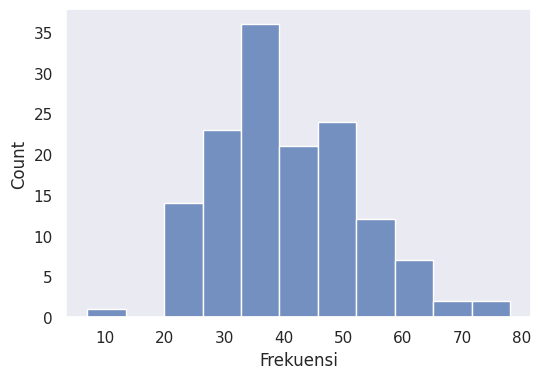

In [17]:
plt.figure(figsize = (6,4))
sns.set_theme(style="dark")
sns.histplot(data= df, x="age",palette="pastel")
plt.xlabel("Frekuensi")
plt.show()

<Axes: ylabel='count'>

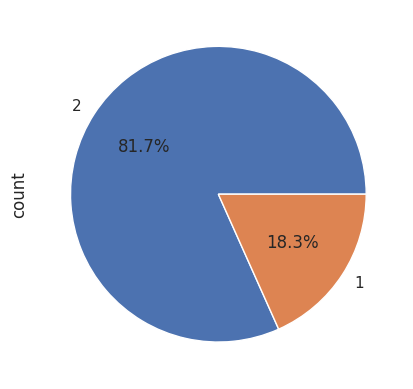

In [18]:
df["class"].value_counts().plot(kind= "pie", autopct = "%1.1f%%")

<Axes: >

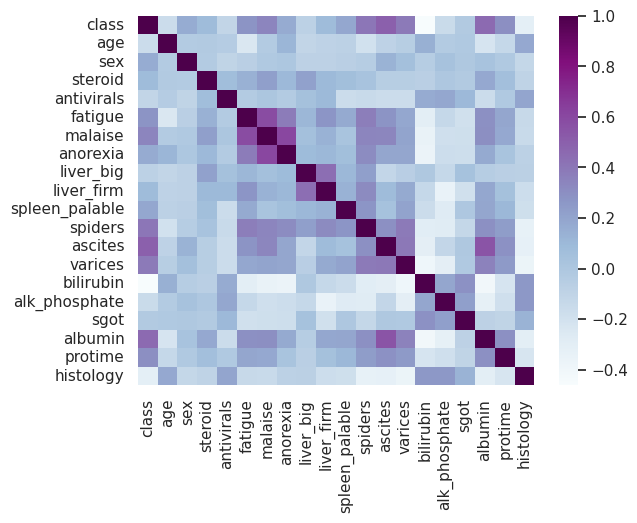

In [20]:
sns.heatmap(df.corr(), cmap="BuPu")

# **Data Preprocessing**

In [26]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [25]:
X = df.drop(columns = "class")
y = df["class"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

# **Modelling**

In [31]:
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print(classification_report(y_pred, y_test))
print(accuracy)
print("Accuracy : {:.2f}%".format(accuracy*100))

              precision    recall  f1-score   support

           1       0.67      0.33      0.44         6
           2       0.85      0.96      0.90        23

    accuracy                           0.83        29
   macro avg       0.76      0.64      0.67        29
weighted avg       0.81      0.83      0.80        29

0.8275862068965517
Accuracy : 82.76%
